# Insurance Prediction Using Logistic Regression

## Import Libraries and modules

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [167]:
df = pd.read_csv("Insurance - Insurance.csv")

In [168]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [170]:
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
df['Vehicle_Age'] = df['Vehicle_Age'].replace({'< 1 Year':3,'1-2 Year':4,'> 2 Years':5})
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace({'Yes':1,'No':0})


In [171]:
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,5,1,40454,26,217,1
1,2,1,76,1,3,0,4,0,33536,26,183,0
2,3,1,47,1,28,0,5,1,38294,26,27,1
3,4,1,21,1,11,1,3,0,28619,152,203,0
4,5,0,29,1,41,1,3,0,27496,152,39,0
5,6,0,24,1,33,0,3,1,2630,160,176,0
6,7,1,23,1,11,0,3,1,23367,152,249,0
7,8,0,56,1,28,0,4,1,32031,26,72,1
8,9,0,24,1,3,1,3,0,27619,152,28,0
9,10,0,32,1,6,1,3,0,28771,152,80,0


In [172]:
df.tail(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381099,381100,0,51,1,28,0,4,1,44504,26,71,0
381100,381101,0,29,1,28,0,3,1,49007,124,137,0
381101,381102,0,70,1,28,0,5,1,50904,122,215,0
381102,381103,0,25,1,41,1,3,1,2630,152,102,0
381103,381104,1,47,1,50,0,4,1,39831,26,235,0
381104,381105,1,74,1,26,1,4,0,30170,26,88,0
381105,381106,1,30,1,37,1,3,0,40016,152,131,0
381106,381107,1,21,1,30,1,3,0,35118,160,161,0
381107,381108,0,68,1,14,0,5,1,44617,124,74,0
381108,381109,1,46,1,29,0,4,0,41777,26,237,0


## Data Wrangling

In [173]:
# No.of Rows and No.of col in Dataset
df.shape

(381109, 12)

In [174]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id                    381109 non-null  int64
 1   Gender                381109 non-null  int64
 2   Age                   381109 non-null  int64
 3   Driving_License       381109 non-null  int64
 4   Region_Code           381109 non-null  int64
 5   Previously_Insured    381109 non-null  int64
 6   Vehicle_Age           381109 non-null  int64
 7   Vehicle_Damage        381109 non-null  int64
 8   Annual_Premium        381109 non-null  int64
 9   Policy_Sales_Channel  381109 non-null  int64
 10  Vintage               381109 non-null  int64
 11  Response              381109 non-null  int64
dtypes: int64(12)
memory usage: 34.9 MB


In [175]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [176]:
# Statistical measures of Dataset
df.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,3.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,3.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,4.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,4.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,5.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [177]:
df['Response'].value_counts() # 1-has insurance
                              # 0 has no insurance


0    334399
1     46710
Name: Response, dtype: int64

In [178]:
# Splitting the features and Responses
x = df.drop(columns='Response',axis=1) # Remaining all keep in x
y = df['Response'] #output

In [179]:
y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

## Data Visualization

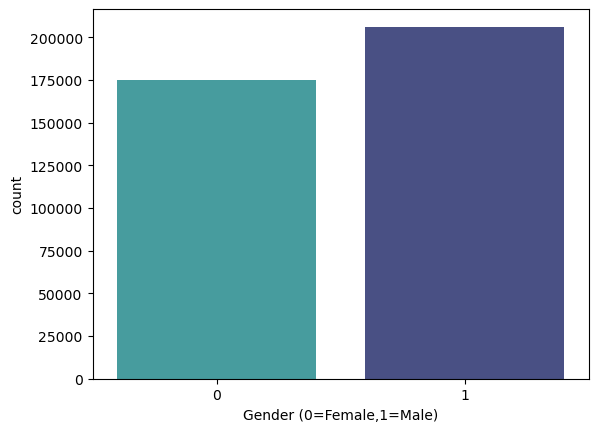

In [180]:
sns.countplot(x='Gender',data=df,palette="mako_r")
plt.xlabel("Gender (0=Female,1=Male)")
plt.show()

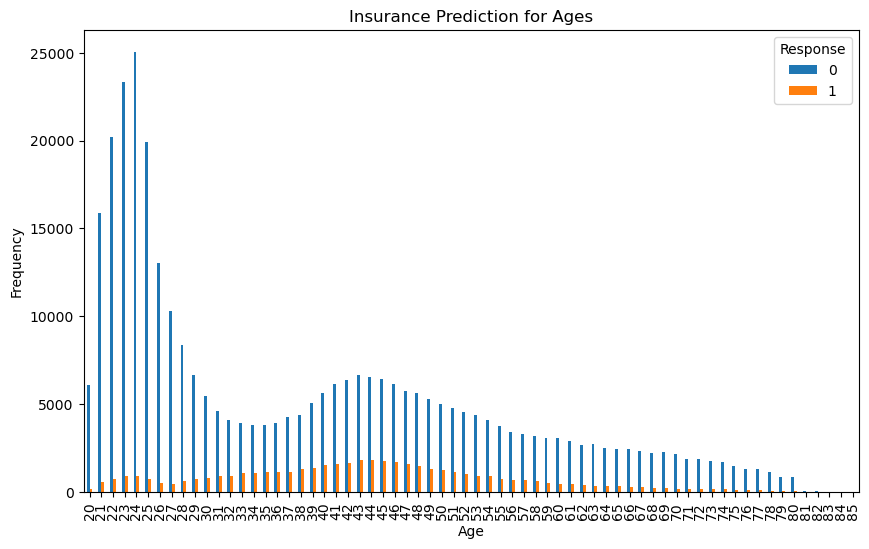

In [181]:
# Insurance Frequency for Ages
pd.crosstab(df.Age,df.Response).plot(kind="bar",figsize=(10,6))
plt.title('Insurance Prediction for Ages')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig('Insurance_Frequency_and_Ages.png')
plt.show()

C:\Users\Richa\AppData\Local\Temp\ipykernel_4360\447720214.py:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Haven't Insurance","Have Insurance")


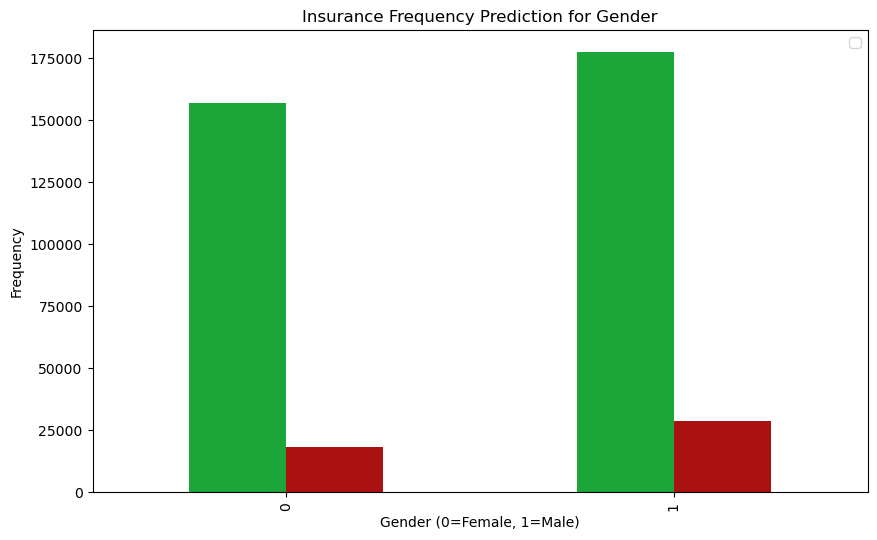

In [182]:
# Insurance Prediction Frequency for Gender
pd.crosstab(df.Gender,df.Response).plot(kind="bar",figsize=(10,6),color=['#1CA538','#AA1111'])
plt.title("Insurance Frequency Prediction for Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.legend("Haven't Insurance","Have Insurance")
plt.ylabel('Frequency')
plt.show()

In [183]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,5,1,40454,26,217,1
1,2,1,76,1,3,0,4,0,33536,26,183,0
2,3,1,47,1,28,0,5,1,38294,26,27,1
3,4,1,21,1,11,1,3,0,28619,152,203,0
4,5,0,29,1,41,1,3,0,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26,1,4,0,30170,26,88,0
381105,381106,1,30,1,37,1,3,0,40016,152,131,0
381106,381107,1,21,1,30,1,3,0,35118,160,161,0
381107,381108,0,68,1,14,0,5,1,44617,124,74,0


## Splitting the Data into Training and Testing Data

In [184]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [185]:
print(x.shape,x_train.shape,x_test.shape)

(381109, 11) (304887, 11) (76222, 11)


## Model Training and Fitting using Logistic Regression

In [186]:
model = LogisticRegression()

In [187]:
model.fit(x_train,y_train)

LogisticRegression()

## Model Evaluation Accuracy Score

In [188]:
#Accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print("Accuracy on Training Data:",training_data_accuracy)


Accuracy on Training Data: 0.8774365584626436


In [189]:
#Accuracy on Testing Data
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)
print("Accuracy on Testing Data:",testing_data_accuracy)

Accuracy on Testing Data: 0.8774369604576107


## Build Predictive System

In [190]:
input_data = (239251,1,32,1,38,1,4,1,41015,154,91)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the numpy array as we are predictive for only on Instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] ==0 ):
    print("The person does not have Insurance")
else:
    print("The person has a Insurance")

[0]
The person does not have Insurance


C:\Users\Richa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [193]:
input_data = (239245,1,43,1,28,1,4,59681,122,44,0)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the numpy array as we are predictive for only on Instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] ==0 ):
    print("The person does not have Insurance")
else:
    print("The person has a Insurance")

[1]
The person has a Insurance


C:\Users\Richa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
